INSTALL ALL THE REQUIRED LIBRARIES USING PIP COMMAND

In [1]:
# !pip install pandas
# !pip install ieugwaspy
# !pip install matplotlib
# !pip install google_auth_oauthlib
# !pip install random
# !pip install warnings
# !pip install numpy
# !pip install scipy
# !pip install statsmodels

STEP1. Extract instruments for exposure from GWAS using the following command

In [2]:
from extract_instruments import *
exposure = extract_instruments("ieu-a-2")
print (exposure)

    pval.exposure  samplesize.exposure chr.exposure  se.exposure  \
0    2.181980e-08               339152            1       0.0030   
1    4.567730e-11               339065            1       0.0031   
2    5.059410e-14               313621            1       0.0087   
3    5.452050e-10               338768            1       0.0029   
4    1.880180e-28               338123            1       0.0030   
..            ...                  ...          ...          ...   
74   7.910430e-19               312079           19       0.0038   
75   1.594010e-08               234806           19       0.0043   
76   7.787000e-09               334494           19       0.0034   
77   2.138010e-08               339045           20       0.0033   
78   1.604980e-08               337300           21       0.0030   

    beta.exposure  pos.exposure id.exposure         SNP  eaf.exposure  \
0         -0.0168      47684677     ieu-a-2    rs977747        0.5333   
1          0.0201      78048331     i

STEP2. Extract outcome data from GWAS using the following command

In [3]:
from extract_outcome_data import *

outcome_data = extract_outcome_data(snps=exposure["SNP"], outcomes=["ieu-a-7"])

print (outcome_data)

Extracting data for 79 SNP(s) from 1 GWAS(s)
           SNP chr        pos  beta.outcome  se.outcome  samplesize.outcome  \
0     rs977747   1   47684677     -0.013896    0.009615              184305   
1   rs17203016   2  208255518      0.020352    0.012231              184305   
2    rs7550711   1  110082886     -0.048354    0.030564              184305   
3    rs9374842   6  120185665      0.013555    0.010605              184305   
4    rs4740619   9   15634326     -0.006546    0.009250              184305   
..         ...  ..        ...           ...         ...                 ...   
74   rs1516725   3  185824004      0.008179    0.013770              184305   
75   rs1016287   2   59305625     -0.014087    0.010574              184305   
76  rs12286929  11  115022404      0.001802    0.009420              184305   
77   rs2176598  11   43864278     -0.026064    0.011128              184305   
78  rs11672660  19   46180184     -0.038968    0.012559              184305   

    pv

STEP3. Harmonize the data using the following command

In [5]:
from harmonise_data import *
data = harmonise_data(exposure , outcome_data)
print (data)

Harmonising Body mass index || id:ieu-a-2 (ieu-a-2) and Coronary heart disease || id:ieu-a-7 (ieu-a-7)
           SNP effect_allele.exposure other_allele.exposure  \
0     rs977747                      G                     T   
1    rs6713510                      A                     G   
2     rs657452                      G                     A   
3    rs2820292                      C                     A   
4   rs13329567                      T                     C   
..         ...                    ...                   ...   
74  rs13107325                      T                     C   
75  rs17001654                      G                     C   
76   rs7531118                      C                     T   
77   rs6567160                      C                     T   
78  rs11672660                      T                     C   

   effect_allele.outcome other_allele.outcome  beta.exposure  beta.outcome  \
0                      G                    T        -0.0168  

STEP4. Perform MR analysis on the harmonized data

In [6]:
from mr import *
result = mr(data)
print (result)

Analysing 'ieu-a-2' on 'ieu-a-7'
['mr_wald_ratio', 'mr_two_sample_ml', 'mr_egger_regression', 'mr_egger_regression_bootstrap', 'mr_simple_median', 'mr_weighted_median', 'mr_penalised_weighted_median', 'mr_ivw', 'mr_ivw_mre', 'mr_ivw_fe', 'mr_raps', 'mr_sign', 'mr_uwr']
mr_two_sample_ml failed to converge


/Users/keivinisufaj/Documents/Interns/Nish Patel/Mendelian-Randomization/mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
/Users/keivinisufaj/Documents/Interns/Nish Patel/Mendelian-Randomization/mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                                 outcome                       exposure  \
2   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
3   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
4   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
5   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
6   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
7   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
8   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
9   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
11  Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
12  Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   

                                               method  nsnp            b  \
2                                            MR Egger  79.0     0.502494   
3                     

/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/k

In [32]:
import matplotlib.pyplot as plt
from blank_plot import blank_plot
def get_method_obj(method):
    method_index = mr_method_list().index(method)
    method_obj = mr_method_list()[method_index]
    return method_obj

def mr_density_plot(singlesnp_results, mr_results, exponentiate=False, bandwidth="nrd0"):
  res = []
  for (id_exposure, id_outcome), d in singlesnp_results.groupby(["id.exposure", "id.outcome"]):
    if np.sum(~d["SNP"].str.contains("All")) < 2:
      return blank_plot("Insufficient number of SNPs")
    d["SNP"] = d["SNP"].astype(str)

    d2 = d[~d["SNP"].str.contains("All - ")]
    # d1 = mr_results[(mr_results["id.exposure"] == d2["id.exposure"].iloc[0]) & (mr_results["id.outcome"] == d2["id.outcome"].iloc[0])]

    xint = 0
    if exponentiate:
      d["b"] = np.exp(d["b"])
      d["up"] = np.exp(d["up"])
      d["lo"] = np.exp(d["lo"])
      xint = 1

    plt.figure()
    plt.hist(d2["b"], weights=1/d2["se"], density=True, bins=20)
    plt.axvline(x=xint, linestyle="dotted")
    plt.scatter(x=d2["b"], y=np.zeros(len(d2)), color="red", s=1/d2["se"])
    for method, b in zip(mr_results["method"], mr_results["b"]):
      print(method, b)
      plt.axvline(x=b)
    plt.xlabel("Per SNP MR estimate")
    plt.show()
    res.append(plt)
  return res

MR Egger 0.5024935097297292
MR Egger (bootstrap) 0.5293761945878043
Simple median 0.7679487179487461
Weighted median 0.003271725704498074
Penalised weighted median -1585.52477108095
Inverse variance weighted 0.3455475139147627
Inverse variance weighted (multiplicative random effects) 0.3455475139147627
Inverse variance weighted (fixed effects) 0.3455475139147627
Sign concordance test 0.39272357723577234
Unweighted regression 0.3455475139147627


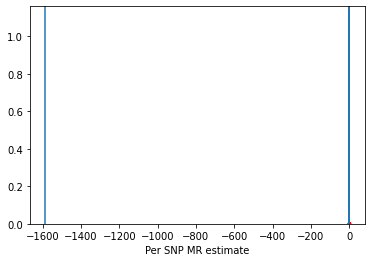

[<module 'matplotlib.pyplot' from '/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>]

In [33]:
mr_density_plot(res, result)

In [29]:
result

exposure                               outcome  \
0   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
1   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
2   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
3   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
4   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
..                            ...                                   ...   
76  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
77  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
78  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
79  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
80  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   

   id.exposure id.outcome samplesize                              SNP  \
0      ieu-a-2    ieu-a-7     184305                         rs977747   
1      ieu-a-2    ieu-a-7     184305                        rs6713510   
2      ieu-a-2    ieu-a-7     184305                         rs657452   
3      ieu-a-2    ieu-a-7     184305                        rs2820292   
4      ieu-a-2    ieu-a-7     184305                       rs13329567   
..         ...        ...        ...                              ...   
76     ieu-a-2    ieu-a-7     184305                        rs7531118   
77     ieu-a-2    ieu-a-7     184305                        rs6567160   
78     ieu-a-2    ieu-a-7     184305                       rs11672660   
79     ieu-a-2    ieu-a-7     184305  All - Inverse variance weighted   
80     ieu-a-2    ieu-a-7     184305                   All - MR Egger   

           b          se             p  
0   0.827143    0.572298  1.483731e-01  
1  -2.304512    0.580030  7.094681e-05  
2   0.337885    0.413410  4.137491e-01  
3   0.991602    0.513193  5.333243e-02  
4   0.460814    0.348140  1.856205e-01  
..       ...         ...           ...  
76  0.533988    0.294051  6.937525e-02  
77  1.027384    0.187895  4.554920e-08  
78  1.149499    0.370457  1.916225e-03  
79  0.345548  223.976341  9.987690e-01  
80  0.502494    0.143961  8.012590e-04  

[81 rows x 9 columns]

In [25]:
from mr_singlesnp import mr_singlesnp

res = mr_singlesnp(data)

/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/Users/keivinisufaj/Documents/Interns/Nish Patel/Mendelian-Randomization/mr_egger_regression.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
/Users/keivinisufaj/Documents/Interns/Nish Patel/Mendelian-Randomization/mr_egger_regression.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packa

In [26]:
res

exposure                               outcome  \
0   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
1   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
2   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
3   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
4   Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
..                            ...                                   ...   
76  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
77  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
78  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
79  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   
80  Body mass index || id:ieu-a-2  Coronary heart disease || id:ieu-a-7   

   id.exposure id.outcome samplesize                              SNP  \
0      ieu-a-2    ieu-a-7     184305                         rs977747   
1      ieu-a-2    ieu-a-7     184305                        rs6713510   
2      ieu-a-2    ieu-a-7     184305                         rs657452   
3      ieu-a-2    ieu-a-7     184305                        rs2820292   
4      ieu-a-2    ieu-a-7     184305                       rs13329567   
..         ...        ...        ...                              ...   
76     ieu-a-2    ieu-a-7     184305                        rs7531118   
77     ieu-a-2    ieu-a-7     184305                        rs6567160   
78     ieu-a-2    ieu-a-7     184305                       rs11672660   
79     ieu-a-2    ieu-a-7     184305  All - Inverse variance weighted   
80     ieu-a-2    ieu-a-7     184305                   All - MR Egger   

           b          se             p  
0   0.827143    0.572298  1.483731e-01  
1  -2.304512    0.580030  7.094681e-05  
2   0.337885    0.413410  4.137491e-01  
3   0.991602    0.513193  5.333243e-02  
4   0.460814    0.348140  1.856205e-01  
..       ...         ...           ...  
76  0.533988    0.294051  6.937525e-02  
77  1.027384    0.187895  4.554920e-08  
78  1.149499    0.370457  1.916225e-03  
79  0.345548  223.976341  9.987690e-01  
80  0.502494    0.143961  8.012590e-04  

[81 rows x 9 columns]

MR Egger 0.5024935097297292
MR Egger (bootstrap) 0.5293761945878043
Simple median 0.7679487179487461
Weighted median 0.003271725704498074
Penalised weighted median -1585.52477108095
Inverse variance weighted 0.3455475139147627
Inverse variance weighted (multiplicative random effects) 0.3455475139147627
Inverse variance weighted (fixed effects) 0.3455475139147627
Sign concordance test 0.39272357723577234
Unweighted regression 0.3455475139147627


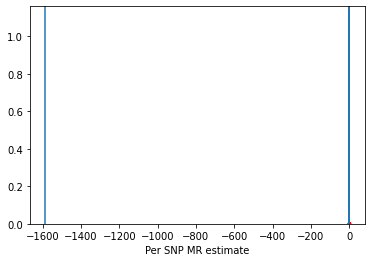

[<module 'matplotlib.pyplot' from '/Users/keivinisufaj/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>]

STEP 5. Sensitivity Analysis <br>
    - Can perform Hetrogeneity Test<br>
    - Can perform Plieotropy Test<br>
using the following commands

In [7]:
from heterogeneity import *
het_result = mr_heterogeneity(data)
pli_result = mr_pleiotropy_test(data)
print (het_result)
print (pli_result)

Extracting data for 79 SNP(s) from 1 GWAS(s)
Harmonising Body mass index || id:ieu-a-2 (ieu-a-2) and Coronary heart disease || id:ieu-a-7 (ieu-a-7)
mr_two_sample_ml failed to converge


C:\Users\nkpat\Desktop\MR\mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
C:\Users\nkpat\Desktop\MR\mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\

          b          se      pval  nsnp           Q  Q_df    Q_pval  \
0  0.502494    0.143961  0.000801  79.0  143.304576  77.0  0.000007   
1  0.345548  223.976341  0.998769  79.0    0.025007  78.0  1.000000   
2  0.345548    0.071808  0.000001  79.0    0.025007  78.0  1.000000   
3  0.345548    4.010411  0.931337  79.0    0.025007  78.0  1.000000   
4  0.345548  223.976341  0.998769  79.0    0.025007  78.0  1.000000   

                method       b_i      se_i    pval_i  \
0  mr_egger_regression -0.001719  0.003986  0.667427   
1               mr_ivw       NaN       NaN       NaN   
2           mr_ivw_mre       NaN       NaN       NaN   
3            mr_ivw_fe       NaN       NaN       NaN   
4               mr_uwr       NaN       NaN       NaN   

                                                 mod  \
0  <statsmodels.regression.linear_model.Regressio...   
1                                                NaN   
2                                                NaN   
3           

C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS an

STEP 6. Plotting<br>
    - Scatter plot:<br>
    We can depict the relationship of the SNP effects on the exposure against the SNP effects on the outcome using a scatter plot.<br>
    -Funnel plot<br>
    Asymmetry in a funnel plot is useful for gauging the reliability of a particular MR analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[<Axes: xlabel='SNP effect on Body mass index || id:ieu-a-2', ylabel='SNP effect on Coronary heart disease || id:ieu-a-7'>]


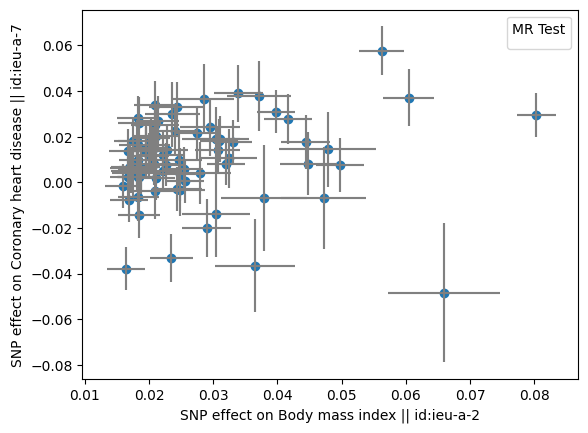

In [8]:
from mr_scatter_plot import *
scatter_plot_result = mr_scatter_plot(result,data)
print (scatter_plot_result)

C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\Desktop\MR\mr_egger_regression.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
C:\Users\nkpat\Desktop\MR\mr_egger_regression.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

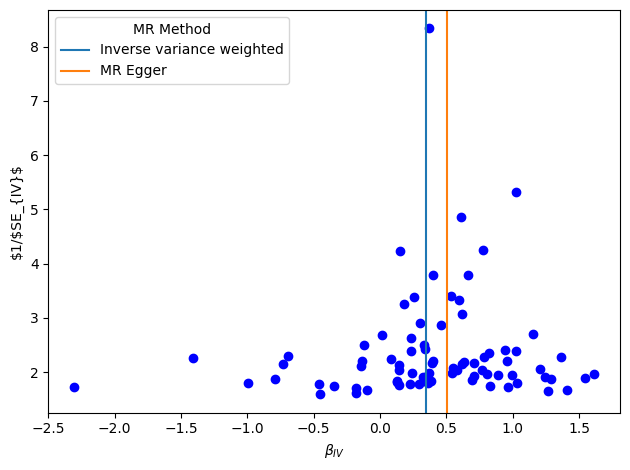

None


In [10]:
from mr_funnel_plot import *
res = mr_singlesnp(data)
plt = mr_funnel_plot(res)
print (plt)